In [2]:
# IMPORTATION DES DIFFERENTS MODULES

import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

In [3]:
# LOADING THE FILE

# Create a variable that contains the path to the file. 
# The path to place is either absolute (i.e. from the root of a disk)
#filename = 'D:/Documents/Code/CoursePython/datas/positionCore.csv
# or relative (i.e. from the folder where the file is located)
filename = 'datas/positionNoyau.csv'
data = pd.read_csv(filename, sep=';', decimal=b',')

In [18]:
# Allows you to see the first 5 rows of the table
data.head()

,Condition,Apoptotic,Apical,Basal,Fichier
0,ctrl,1,13.10,14.2,2015-02-11 sqhGFP Shot Dcp1_p1
1,ctrl,0,11.50,15.5,2015-02-11 sqhGFP Shot Dcp1_p1
2,ctrl,0,7.39,20.2,2015-02-11 sqhGFP Shot Dcp1_p1
3,ctrl,0,5.55,22.4,2015-02-11 sqhGFP Shot Dcp1_p1
4,ctrl,0,4.51,22.7,2015-02-11 sqhGFP Shot Dcp1_p1


In [4]:
# Provides basic information about the numeric columns.
data.describe()

,Apoptotic,Apical,Basal
count,134.000000,134.000000,134.000000
mean,0.186567,8.593410,16.192388
std,0.391025,4.425846,5.946123
min,0.000000,1.080000,5.410000
25%,0.000000,5.420000,11.025000
50%,0.000000,7.670000,16.250000
75%,0.000000,11.345000,20.575000
max,1.000000,22.460000,29.600000


In [5]:
# 1- Add a column that calculates the normalized position of the core (pos = apical/(apical+basal))
data['normalized_position'] = data.Apical/(data.Apical+data.Basal)

In [23]:
# You can see this new column
data.head()

,Condition,Apoptotic,Apical,Basal,Fichier,normalized_position
0,ctrl,1,13.10,14.2,2015-02-11 sqhGFP Shot Dcp1_p1,0.479853
1,ctrl,0,11.50,15.5,2015-02-11 sqhGFP Shot Dcp1_p1,0.425926
2,ctrl,0,7.39,20.2,2015-02-11 sqhGFP Shot Dcp1_p1,0.267851
3,ctrl,0,5.55,22.4,2015-02-11 sqhGFP Shot Dcp1_p1,0.198569
4,ctrl,0,4.51,22.7,2015-02-11 sqhGFP Shot Dcp1_p1,0.165748


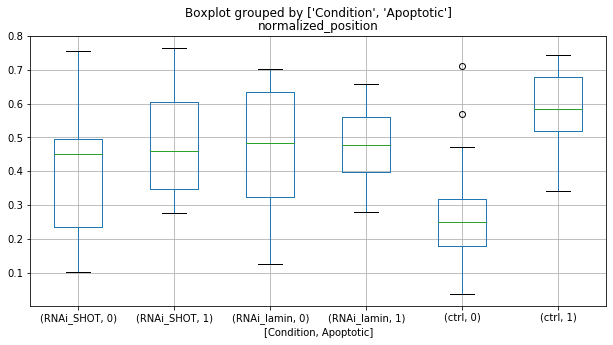

In [28]:
#2- Display the boxplot according to the Condition column, and according to the Condition and Apoptotic columns.
fig = plt.figure(figsize=(10,5))
ax = plt.axes()
data.boxplot(column='normalized_position', by=['Condition', 'Apoptotic'], ax=ax)

In [6]:
# 3- Do the statistical tests to see if there are significant differences or not. 

# It is possible to create intermediate variables that contain the filtered/wanted data
ctr_apopto = data[(data.Condition=='ctrl') & (data.Apoptotic==1)]['normalized_position']
ctr_no_apopto = data[(data.Condition=='ctrl') & (data.Apoptotic==0)]['normalized_position']

stat, p = stats.mannwhitneyu(ctr_apopto, ctr_no_apopto)

print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=787.000, p=0.000
Probably different distributions
